In [364]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [365]:
from tensorflow.contrib.layers import fully_connected

In [366]:
training_df=pd.read_csv("F://ML Paper Project//UNSW_NB15_training-set.csv")
testing_df=pd.read_csv("F://ML Paper Project//UNSW_NB15_testing-set.csv")

In [367]:
training_data=np.array(training_df)
testing_data=np.array(testing_df)

In [368]:
training_data.shape

(175341, 45)

In [369]:
training_labels=training_data[:,43]

In [370]:
training_features=training_data[:,0:43]

In [371]:
training_labels

array(['Normal', 'Normal', 'Normal', ..., 'Generic', 'Generic', 'Generic'],
      dtype=object)

In [372]:
training_features

array([[1, 0.121478, 'tcp', ..., 1, 1, 0],
       [2, 0.6499020000000001, 'tcp', ..., 1, 6, 0],
       [3, 1.623129, 'tcp', ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 'udp', ..., 3, 12, 0],
       [175340, 9e-06, 'udp', ..., 30, 30, 0],
       [175341, 9e-06, 'udp', ..., 30, 30, 0]], dtype=object)

In [373]:
#Integer Encoding Labels
for i in range(0,len(training_labels)):
    if training_labels[i]=='Normal':
        training_labels[i]=0
    elif training_labels[i]=='Fuzzers':
        training_labels[i]=1
    elif training_labels[i]=='Analysis':
        training_labels[i]=2
    elif training_labels[i]=='Backdoor':
        training_labels[i]=3
    elif training_labels[i]=='DoS':
        training_labels[i]=4
    elif training_labels[i]=='Exploits':
        training_labels[i]=5
    elif training_labels[i]=='Generic':
        training_labels[i]=6
    elif training_labels[i]=='Reconaissance':
        training_labels[i]=7
    elif training_labels[i]=='Shellcode':
        training_labels[i]=8
    elif training_labels[i]=='Worms':
        training_labels[i]=9

In [374]:
training_labels

array([0, 0, 0, ..., 6, 6, 6], dtype=object)

In [375]:
proto=np.unique(training_features[:,2])

In [376]:
l=training_features[:,3]
for i in range(0,len(l)):
    if l[i]=='-':
        l[i]=0
    elif l[i]=='dhcp':
        l[i]=1
    elif l[i]=='dns':
        l[i]=2
    elif l[i]=='ftp':
        l[i]=3
    elif l[i]=='ftp-data':
        l[i]=4
    elif l[i]=='http':
        l[i]=5
    elif l[i]=='irc':
        l[i]=6
    elif l[i]=='pop3':
        l[i]=7
    elif l[i]=='radius':
        l[i]=8
    elif l[i]=='smtp':
        l[i]=9
    elif l[i]=='snmp':
        l[i]=10
    elif l[i]=='ssh':
        l[i]=11
    elif l[i]=='ssl':
        l[i]=12

training_features[:,3]=l

In [377]:
training_features[:,3]

array([0, 0, 0, ..., 2, 2, 2], dtype=object)

In [378]:
np.unique(training_features[:,4])

array(['CON', 'ECO', 'FIN', 'INT', 'PAR', 'REQ', 'RST', 'URN', 'no'],
      dtype=object)

In [379]:
l=training_features[:,4]
for i in range(0,len(l)):
    if l[i]=='CON':
        l[i]=0
    elif l[i]=='ECO':
        l[i]=1
    elif l[i]=='FIN':
        l[i]=2
    elif l[i]=='INT':
        l[i]=3
    elif l[i]=='PAR':
        l[i]=4
    elif l[i]=='REQ':
        l[i]=5
    elif l[i]=='RST':
        l[i]=6
    elif l[i]=='URN':
        l[i]=7
    elif l[i]=='no':
        l[i]=8

training_features[:,4]=l

In [380]:
training_features[:,4]

array([2, 2, 2, ..., 3, 3, 3], dtype=object)

In [381]:
training_features

array([[1, 0.121478, 'tcp', ..., 1, 1, 0],
       [2, 0.6499020000000001, 'tcp', ..., 1, 6, 0],
       [3, 1.623129, 'tcp', ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 'udp', ..., 3, 12, 0],
       [175340, 9e-06, 'udp', ..., 30, 30, 0],
       [175341, 9e-06, 'udp', ..., 30, 30, 0]], dtype=object)

In [382]:
proto

array(['3pc', 'a/n', 'aes-sp3-d', 'any', 'argus', 'aris', 'arp', 'ax.25',
       'bbn-rcc', 'bna', 'br-sat-mon', 'cbt', 'cftp', 'chaos',
       'compaq-peer', 'cphb', 'cpnx', 'crtp', 'crudp', 'dcn', 'ddp',
       'ddx', 'dgp', 'egp', 'eigrp', 'emcon', 'encap', 'etherip', 'fc',
       'fire', 'ggp', 'gmtp', 'gre', 'hmp', 'i-nlsp', 'iatp', 'ib',
       'icmp', 'idpr', 'idpr-cmtp', 'idrp', 'ifmp', 'igmp', 'igp', 'il',
       'ip', 'ipcomp', 'ipcv', 'ipip', 'iplt', 'ipnip', 'ippc', 'ipv6',
       'ipv6-frag', 'ipv6-no', 'ipv6-opts', 'ipv6-route', 'ipx-n-ip',
       'irtp', 'isis', 'iso-ip', 'iso-tp4', 'kryptolan', 'l2tp', 'larp',
       'leaf-1', 'leaf-2', 'merit-inp', 'mfe-nsp', 'mhrp', 'micp',
       'mobile', 'mtp', 'mux', 'narp', 'netblt', 'nsfnet-igp', 'nvp',
       'ospf', 'pgm', 'pim', 'pipe', 'pnni', 'pri-enc', 'prm', 'ptp',
       'pup', 'pvp', 'qnx', 'rdp', 'rsvp', 'rtp', 'rvd', 'sat-expak',
       'sat-mon', 'sccopmce', 'scps', 'sctp', 'sdrp', 'secure-vmtp',
       'sep', 'skip'

In [383]:
d=dict.fromkeys(proto)

In [384]:
l=d.keys()

In [385]:
v=0
for x in l:
    d[x]=v
    v=v+1

In [386]:
proto_list=training_features[:,2]
for i in range(0,len(proto_list)):
    for j in l:
        if proto_list[i]==j:
            proto_list[i]=d[j]

training_features[:,2]=proto_list

In [387]:
training_features

array([[1, 0.121478, 29, ..., 1, 1, 0],
       [2, 0.6499020000000001, 29, ..., 1, 6, 0],
       [3, 1.623129, 29, ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 115, ..., 3, 12, 0],
       [175340, 9e-06, 115, ..., 30, 30, 0],
       [175341, 9e-06, 115, ..., 30, 30, 0]], dtype=object)

In [388]:
training_features[:,2]

array([29, 29, 29, ..., 115, 115, 115], dtype=object)

In [389]:
training_features.shape

(175341, 43)

In [390]:
std_list=[]

In [391]:
#Perform normalization on dataset
for i in range(0,43):
    mean=np.mean(training_features[:,i])
    std=np.std(training_features[:,i])
    std_list.append(std)
    for j in range(0,175341):
        training_features[j][i]=(training_features[j][i]-mean)/std
        

In [392]:
training_features

array([[-1.7320409294122083, -0.1910288091606379, -0.9907313167166802,
        ..., -0.715713656611942, -0.7530740174877311,
        -0.12650796304403503],
       [-1.7320211730425332, -0.10948479464168344, -0.9907313167166802,
        ..., -0.715713656611942, -0.28825700778157093,
        -0.12650796304403503],
       [-1.7320014166728581, 0.04069921785252289, -0.9907313167166802,
        ..., -0.5955425666085573, -0.28825700778157093,
        -0.12650796304403503],
       ...,
       [1.7320014166728581, -0.2097733588018406, 1.0350256394248076, ...,
        -0.4753714766051727, 0.26952340386582113, -0.12650796304403503],
       [1.7320211730425332, -0.2097733588018406, 1.0350256394248076, ...,
        2.7692479534862113, 1.9428646388079973, -0.12650796304403503],
       [1.7320409294122083, -0.2097733588018406, 1.0350256394248076, ...,
        2.7692479534862113, 1.9428646388079973, -0.12650796304403503]],
      dtype=object)

In [393]:
std_list

[50616.5867741659,
 6.480230377634532,
 42.45326653786071,
 2.305144095553943,
 0.8679394065384229,
 136.88720656043952,
 110.25795617029418,
 174765.14594941295,
 143653.8080748578,
 165400.5068013864,
 102.93971751397288,
 110.5065480561588,
 188356909.88190487,
 2421305.4841721063,
 66.00487031558049,
 52.73284891995271,
 7242.225189039217,
 987.0903799600004,
 44965.718295016995,
 4061.0317006883483,
 127.00066200116235,
 1355260384.6054034,
 1353995685.173201,
 126.88616771391364,
 0.07935374554184842,
 0.043399659749737765,
 0.040506240405952354,
 204.67677593269065,
 258.3163193739851,
 0.7769085707482282,
 54207.81271516606,
 10.704300696224685,
 0.9544033774218443,
 8.052453421725263,
 8.047081250439838,
 5.783568568849495,
 10.956154333405415,
 0.12604768794778642,
 0.12604768794778642,
 0.7012056071913747,
 8.321468998673767,
 10.75692131654307,
 0.12451518899845022]

In [394]:
num_inputs=43
num_hid1=22
num_hid2=10
num_hid3=22
num_output=43

In [411]:
lr=0.01
actf=tf.nn.elu


In [412]:
X=tf.placeholder(tf.float32,shape=[None,num_inputs])

In [413]:
initializer=tf.variance_scaling_initializer()

In [414]:
w1=tf.Variable(initializer([num_inputs,num_hid1]),dtype=tf.float32)
w2=tf.Variable(initializer([num_hid1,num_hid2]),dtype=tf.float32)
w3=tf.Variable(initializer([num_hid2,num_hid3]),dtype=tf.float32)
w4=tf.Variable(initializer([num_hid3,num_output]),dtype=tf.float32)

In [415]:
b1=tf.Variable(tf.zeros(num_hid1))
b2=tf.Variable(tf.zeros(num_hid2))
b3=tf.Variable(tf.zeros(num_hid3))
b4=tf.Variable(tf.zeros(num_output))

In [416]:
hid_layer1=actf(tf.matmul(X,w1)+b1)
hid_layer2=tf.nn.dropout(tf.matmul(hid_layer1,w2)+b2,0.8)
hid_layer3=actf(tf.matmul(hid_layer2,w3)+b3)
output_layer=actf(tf.matmul(hid_layer3,w4)+b4)

In [417]:
def show_hist_of_weight(all_weight_list,status='before'):
    fig = plt.figure()
    weight_index = 0

    for i in range(1,1+int(len(all_weight_list)//3)):
        ax = fig.add_subplot(1,4,i)
        ax.grid(False)
        temp_weight_list = all_weight_list[weight_index:weight_index+3]
        for temp_index in range(len(temp_weight_list)):
            current_flat = temp_weight_list[temp_index].flatten()
            ax.hist(current_flat,histtype='step',bins='auto',label=str(temp_index+weight_index))
            ax.legend()
        ax.set_title('From Layer : '+str(weight_index+1)+' to '+str(weight_index+3))
        weight_index = weight_index + 3
    plt.savefig('viz/weights_'+str(status)+"_training.png")
    plt.close('all')

In [418]:
loss=tf.reduce_mean(tf.square(output_layer-X))


In [419]:
optimizer=tf.train.AdamOptimizer(lr)
train=optimizer.minimize(loss)

In [420]:
init=tf.global_variables_initializer()

In [421]:
num_epoch=500
batch_size=10000

In [422]:
def next_batch(num, data):
    '''
    Return a total of `num` random samples 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]

    return np.asarray(data_shuffle)

In [423]:
x=[]
y=[]
l=[]

In [424]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epoch):
        num_batches=len(training_features)//batch_size 
        #learning rate decay
        lr = lr * (0.5 **(epoch//100))
        for iteration in range(num_batches):
            X_batch=next_batch(batch_size,training_features)
            sess.run(train,feed_dict={X:X_batch})
        train_loss=loss.eval(feed_dict={X:X_batch})
        print("epoch {} loss {}".format(epoch,train_loss))
        x.append(epoch)
        y.append(train_loss)
    for var, val in zip(vars, vars_vals):
        if var.get_shape()==(43, 22):
            l=val
print(l)

epoch 0 loss 0.46247100830078125
epoch 1 loss 0.31953009963035583
epoch 2 loss 0.3230462968349457
epoch 3 loss 0.22585101425647736
epoch 4 loss 0.2201002687215805
epoch 5 loss 0.3184952437877655
epoch 6 loss 0.19092418253421783
epoch 7 loss 0.20555312931537628
epoch 8 loss 0.19543275237083435
epoch 9 loss 0.19295509159564972
epoch 10 loss 0.18540768325328827
epoch 11 loss 0.17727261781692505
epoch 12 loss 0.18350286781787872
epoch 13 loss 0.20725151896476746
epoch 14 loss 0.18079979717731476
epoch 15 loss 0.2076844722032547
epoch 16 loss 0.18624958395957947
epoch 17 loss 0.17108123004436493
epoch 18 loss 0.17892946302890778
epoch 19 loss 0.17853966355323792
epoch 20 loss 0.1559009850025177
epoch 21 loss 0.1856313943862915
epoch 22 loss 0.15763622522354126
epoch 23 loss 0.16154621541500092
epoch 24 loss 0.1666639894247055
epoch 25 loss 0.15525855123996735
epoch 26 loss 0.1576606035232544
epoch 27 loss 0.16203878819942474
epoch 28 loss 0.17861029505729675
epoch 29 loss 0.1597801297903061

epoch 239 loss 0.13053245842456818
epoch 240 loss 0.12934385240077972
epoch 241 loss 0.13814078271389008
epoch 242 loss 0.12461105734109879
epoch 243 loss 0.1261657476425171
epoch 244 loss 0.12068460881710052
epoch 245 loss 0.13207407295703888
epoch 246 loss 0.13903586566448212
epoch 247 loss 0.1361190378665924
epoch 248 loss 0.13429896533489227
epoch 249 loss 0.12439867109060287
epoch 250 loss 0.13140058517456055
epoch 251 loss 0.13229192793369293
epoch 252 loss 0.13931196928024292
epoch 253 loss 0.13167712092399597
epoch 254 loss 0.13626417517662048
epoch 255 loss 0.14230877161026
epoch 256 loss 0.12836363911628723
epoch 257 loss 0.14303821325302124
epoch 258 loss 0.21019631624221802
epoch 259 loss 0.1443873941898346
epoch 260 loss 0.135313481092453
epoch 261 loss 0.1330234557390213
epoch 262 loss 0.13885463774204254
epoch 263 loss 0.13707372546195984
epoch 264 loss 0.12154104560613632
epoch 265 loss 0.13052202761173248
epoch 266 loss 0.13516879081726074
epoch 267 loss 0.151851221919

epoch 475 loss 0.1245732307434082
epoch 476 loss 0.1286366581916809
epoch 477 loss 0.12059365212917328
epoch 478 loss 0.12165499478578568
epoch 479 loss 0.1298498660326004
epoch 480 loss 0.11442053318023682
epoch 481 loss 0.12476485222578049
epoch 482 loss 0.12361668795347214
epoch 483 loss 0.13725651800632477
epoch 484 loss 0.1170058399438858
epoch 485 loss 0.12581902742385864
epoch 486 loss 0.1321363002061844
epoch 487 loss 0.13397546112537384
epoch 488 loss 0.12264200299978256
epoch 489 loss 0.12542381882667542
epoch 490 loss 0.12747646868228912
epoch 491 loss 0.13819074630737305
epoch 492 loss 0.1325007528066635
epoch 493 loss 0.12624618411064148
epoch 494 loss 0.15175266563892365
epoch 495 loss 0.12572485208511353
epoch 496 loss 0.12353583425283432
epoch 497 loss 0.12441248446702957
epoch 498 loss 0.12424641102552414
epoch 499 loss 0.12041638791561127
[[-1.62402749e-01  9.01542827e-02 -2.54918672e-02  9.11884662e-03
   1.52284563e-01  1.46639645e-01 -1.37276202e-01 -1.26438007e-01

In [425]:
sum_weights=[]
for row in l:
    total_weight=0
    for a in row:
        total_weight+=a
    sum_weights.append(total_weight)

In [427]:
sum_weights

[-0.427984737791121,
 0.5041913902387023,
 -0.05429937783628702,
 -0.11058939434587955,
 0.6495662829838693,
 -0.7738798372447491,
 -0.4614885747432709,
 0.4666438978165388,
 0.3022637653630227,
 -0.3482034862972796,
 -0.2485786508768797,
 -0.7205295963212848,
 -0.16972158587304875,
 0.22540449211373925,
 0.6344299791380763,
 0.2520760796032846,
 -0.7065550084225833,
 -0.35162567254155874,
 0.8026347318664193,
 -0.00047981273382902145,
 -0.0687573915347457,
 0.3865116722881794,
 0.2399711851903703,
 -0.9901413023180794,
 -0.6638012593175517,
 -1.5791958514600992,
 1.0918580600991845,
 0.015271273732651025,
 0.8234639260917902,
 0.45331649109721184,
 -1.3470771238207817,
 0.02436975296586752,
 -0.8480224299710244,
 -0.31828555651009083,
 -0.11283503472805023,
 -0.2228801327291876,
 0.07878682418959215,
 0.860773722990416,
 0.4309514816850424,
 -0.45890095859067515,
 -0.18528567720204592,
 1.1224199812859297,
 0.3383674193173647]

In [428]:
var_imp=[]
for i in range(0,len(sum_weights)):
    prod=sum_weights[i]
    var_imp.append(prod)

In [429]:
var_imp

[-0.427984737791121,
 0.5041913902387023,
 -0.05429937783628702,
 -0.11058939434587955,
 0.6495662829838693,
 -0.7738798372447491,
 -0.4614885747432709,
 0.4666438978165388,
 0.3022637653630227,
 -0.3482034862972796,
 -0.2485786508768797,
 -0.7205295963212848,
 -0.16972158587304875,
 0.22540449211373925,
 0.6344299791380763,
 0.2520760796032846,
 -0.7065550084225833,
 -0.35162567254155874,
 0.8026347318664193,
 -0.00047981273382902145,
 -0.0687573915347457,
 0.3865116722881794,
 0.2399711851903703,
 -0.9901413023180794,
 -0.6638012593175517,
 -1.5791958514600992,
 1.0918580600991845,
 0.015271273732651025,
 0.8234639260917902,
 0.45331649109721184,
 -1.3470771238207817,
 0.02436975296586752,
 -0.8480224299710244,
 -0.31828555651009083,
 -0.11283503472805023,
 -0.2228801327291876,
 0.07878682418959215,
 0.860773722990416,
 0.4309514816850424,
 -0.45890095859067515,
 -0.18528567720204592,
 1.1224199812859297,
 0.3383674193173647]

In [430]:
features=list(range(1,44))
feature_names=list(training_df)
feature_names

['id',
 'dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label']

In [431]:
plt.rcParams['figure.figsize']=(20,20)

Text(0,0.5,'Feature Importance Values')

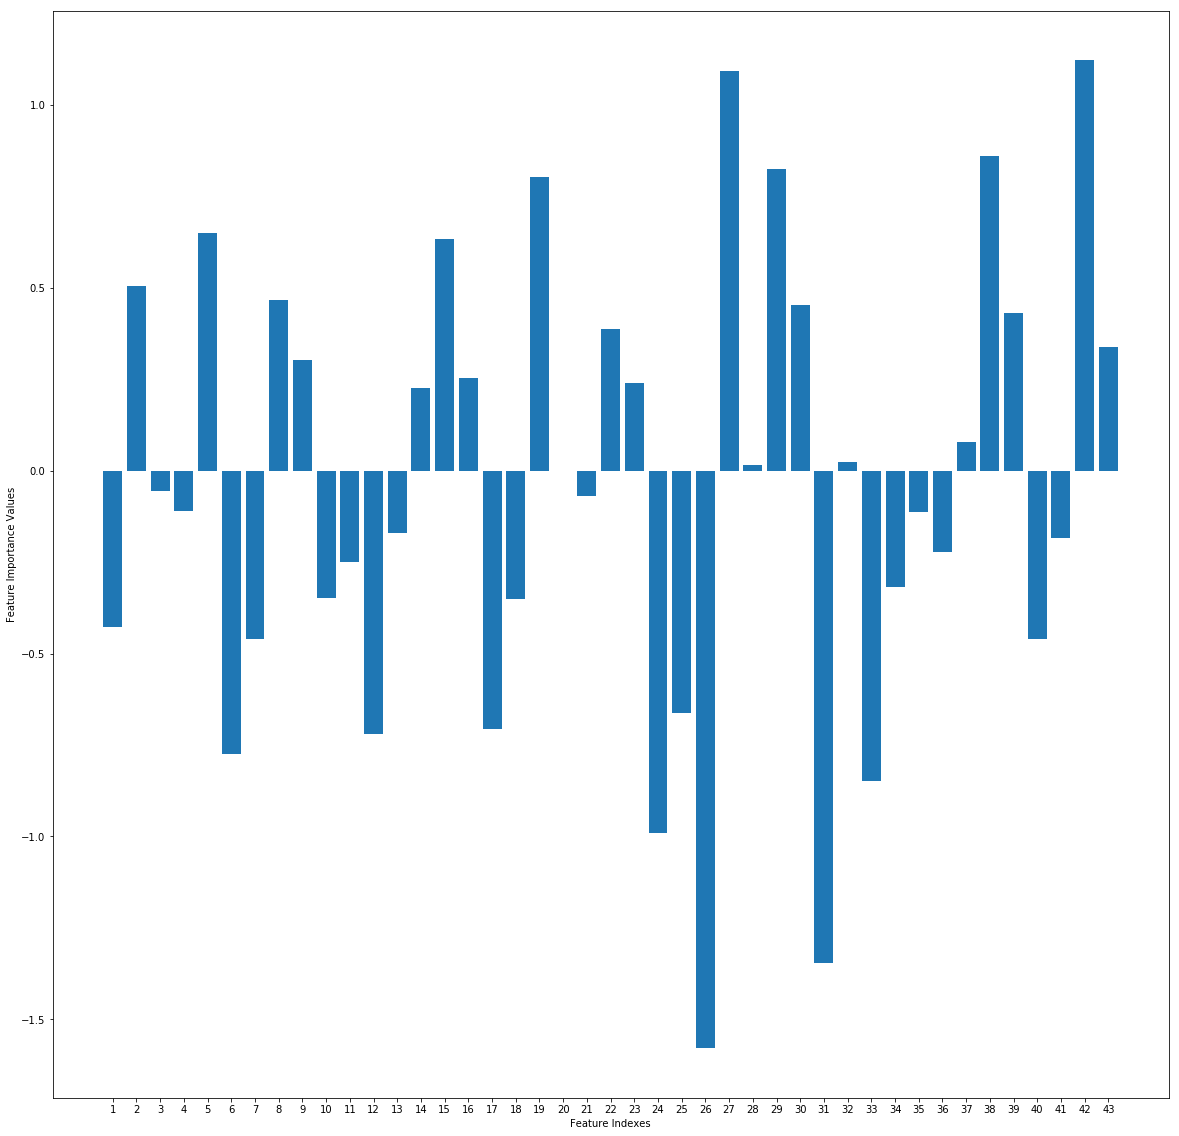

In [432]:
x_vals=np.arange(len(features))
plt.bar(x_vals,var_imp,align='center',alpha=1)
plt.xticks(x_vals,features)
plt.xlabel("Feature Indexes")
plt.ylabel("Feature Importance Values")


In [433]:
best_features=sorted(range(len(var_imp)), key=lambda i: var_imp[i], reverse=True)[:10]

In [434]:
for i in best_features:
    print(feature_names[i])

ct_srv_dst
ackdat
is_ftp_login
dmean
sjit
state
sloss
dur
sbytes
trans_depth


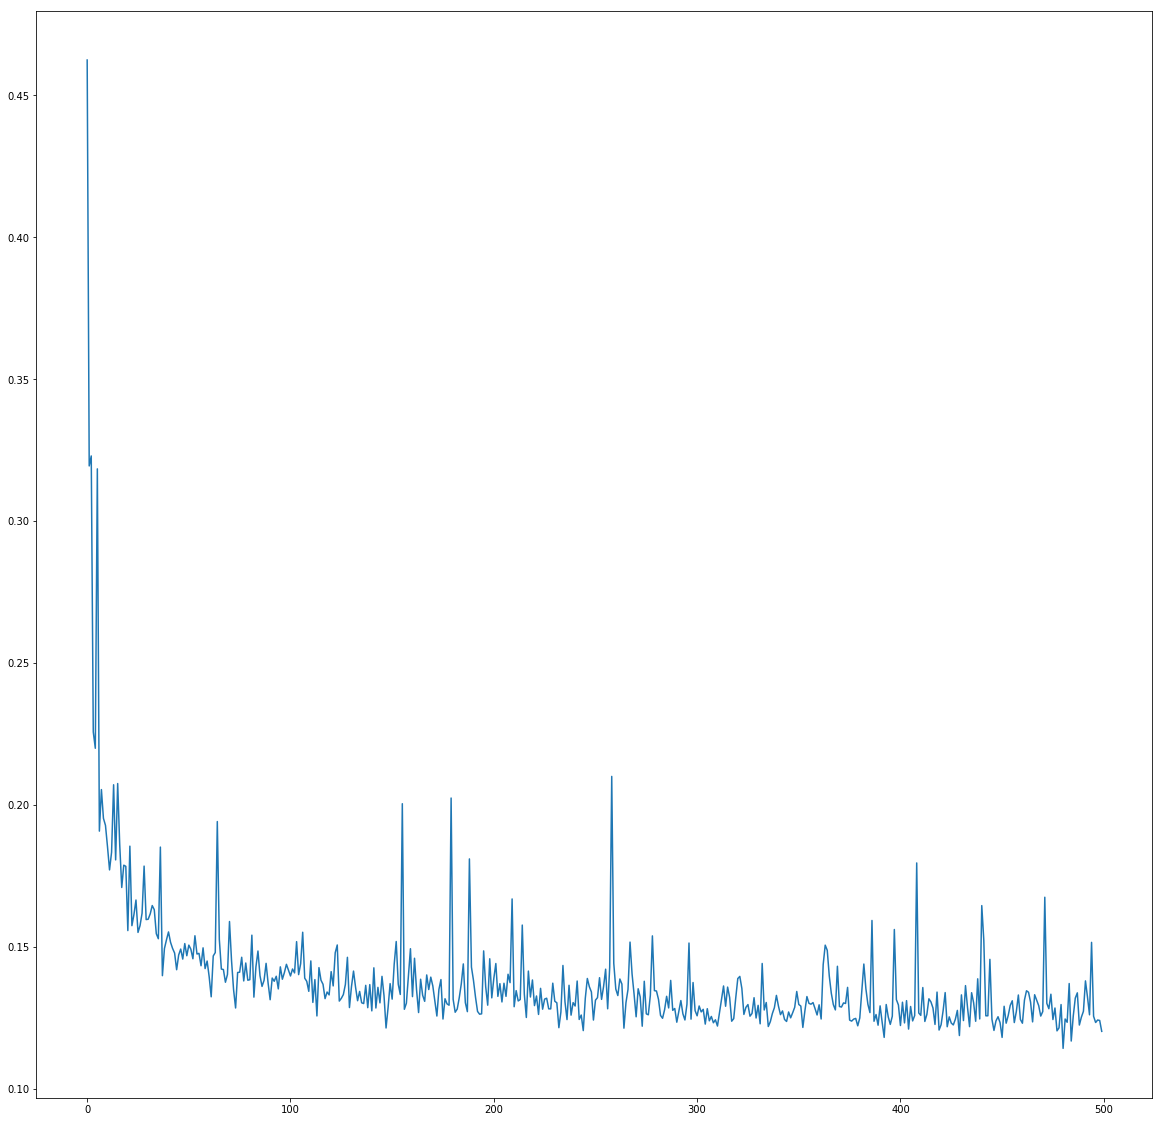

In [435]:
plt.rcParams['figure.figsize']=(20,20)
plt.plot(x,y)

In [436]:
print(np.var(var_imp))

0.3700735361062973
